<a href="https://colab.research.google.com/github/emredeveloper/Data-Preprocessing/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Örnek veri seti oluşturma
np.random.seed(42)

# 200 müşterilik bir veri seti oluşturma
num_customers = 200
customer_ids = range(1, num_customers + 1)
genders = np.random.choice(['Male', 'Female'], num_customers)
ages = np.random.randint(18, 70, num_customers)
annual_incomes = np.random.randint(15, 150, num_customers)  # bin $
spending_scores = np.random.randint(1, 101, num_customers)  # 1-100

data = {
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'Annual Income (k$)': annual_incomes,
    'Spending Score (1-100)': spending_scores
}

df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,22,12
1,2,Female,56,41,25
2,3,Male,66,41,52
3,4,Male,69,35,85
4,5,Male,49,44,100


In [2]:
# Yeni değişkenler oluşturma (bu veri setinde gerek yok)
new_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()


In [3]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırma
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

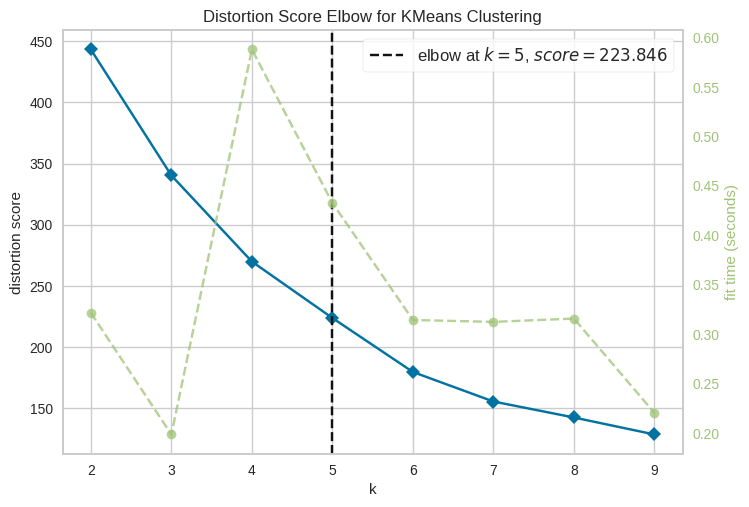

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Elbow yöntemi ile optimum küme sayısını belirleme
elbow = KElbowVisualizer(KMeans(random_state=42), k=(2,10))
elbow.fit(scaled_df)
elbow.show()
optimum_clusters = elbow.elbow_value_


In [5]:
# K-Means modelini oluşturma
kmeans = KMeans(n_clusters=optimum_clusters, random_state=42).fit(scaled_df)
df["Segment"] = kmeans.labels_ + 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,49,22,12,2
1,2,Female,56,41,25,2
2,3,Male,66,41,52,5
3,4,Male,69,35,85,5
4,5,Male,49,44,100,5
...,...,...,...,...,...,...
195,196,Female,47,97,45,1
196,197,Female,55,125,77,1
197,198,Female,55,131,4,3
198,199,Male,62,83,62,5


In [7]:
# Segmentlerin istatistiksel incelemesi
segment_analysis = df.groupby("Segment").agg(Count=("Segment", "count"),
                                             Age_Mean=("Age", "mean"),
                                             Annual_Income_Mean=("Annual Income (k$)", "mean"),
                                             Spending_Score_Mean=("Spending Score (1-100)", "mean")).reset_index()

print(segment_analysis.to_markdown())


|    |   Segment |   Count |   Age_Mean |   Annual_Income_Mean |   Spending_Score_Mean |
|---:|----------:|--------:|-----------:|---------------------:|----------------------:|
|  0 |         1 |      37 |    51.4865 |             120.946  |               70.2703 |
|  1 |         2 |      40 |    44.175  |              47.3    |               18.975  |
|  2 |         3 |      41 |    41.5122 |             120.585  |               19.7317 |
|  3 |         4 |      43 |    28.3256 |              73.1163 |               65.8372 |
|  4 |         5 |      39 |    58.6923 |              45.8462 |               68.5385 |


In [8]:
segment_analysis

,Segment,Count,Age_Mean,Annual_Income_Mean,Spending_Score_Mean
0,1,37,51.486486,120.945946,70.270270
1,2,40,44.175000,47.300000,18.975000
2,3,41,41.512195,120.585366,19.731707
3,4,43,28.325581,73.116279,65.837209
4,5,39,58.692308,45.846154,68.538462


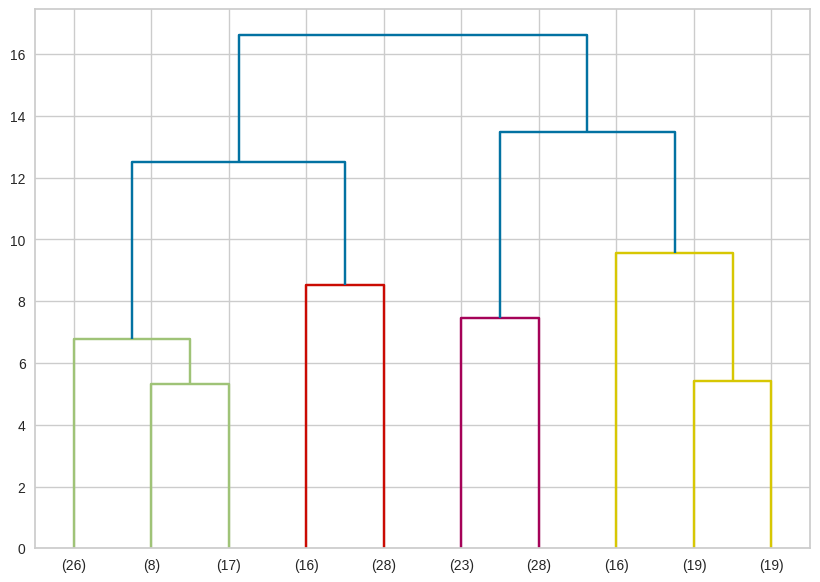

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Hiyerarşik kümeleme
hc = linkage(scaled_df, method="ward")

# Dendrogram çizimi
plt.figure(figsize=(10, 7))
dendrogram(hc, truncate_mode="lastp", p=10, leaf_font_size=10)
plt.axhline(y=200, color='r', linestyle='--')
plt.show()


In [11]:
from scipy.cluster.hierarchy import fcluster

# Hiyerarşik kümeleme ile segmentleme
df["Hc_Segments"] = fcluster(hc, t=200, criterion="distance")


In [12]:
# Hiyerarşik segmentlerin istatistiksel incelemesi
hc_segment_analysis = df.groupby("Hc_Segments").agg(Count=("Hc_Segments", "count"),
                                                    Age_Mean=("Age", "mean"),
                                                    Annual_Income_Mean=("Annual Income (k$)", "mean"),
                                                    Spending_Score_Mean=("Spending Score (1-100)", "mean")).reset_index()

print(hc_segment_analysis.to_markdown())


|    |   Hc_Segments |   Count |   Age_Mean |   Annual_Income_Mean |   Spending_Score_Mean |
|---:|--------------:|--------:|-----------:|---------------------:|----------------------:|
|  0 |             1 |     200 |     44.405 |               81.215 |                 48.36 |


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

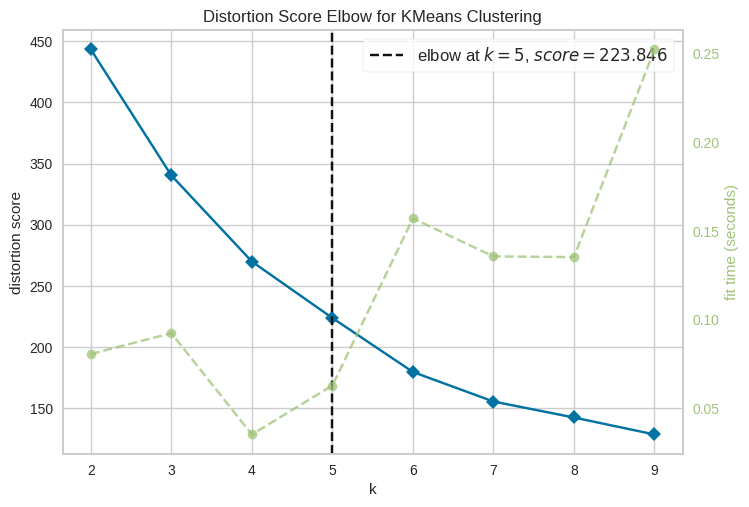

In [13]:
elbow = KElbowVisualizer(KMeans(random_state=42), k=(2,10))
elbow.fit(scaled_df)
elbow.show()
optimum_clusters = elbow.elbow_value_


In [14]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering modeli
agg_cluster = AgglomerativeClustering(n_clusters=optimum_clusters, linkage="ward")
df["Agg_Segments"] = agg_cluster.fit_predict(scaled_df) + 1


In [17]:
# Agglomerative Clustering segmentlerinin istatistiksel incelemesi
agg_segment_analysis = df.groupby("Agg_Segments").agg(Count=("Agg_Segments", "count"),
                                                      Age_Mean=("Age", "mean"),
                                                      Annual_Income_Mean=("Annual Income (k$)", "mean"),
                                                      Spending_Score_Mean=("Spending Score (1-100)", "mean")).reset_index()
agg_segment_analysis


,Agg_Segments,Count,Age_Mean,Annual_Income_Mean,Spending_Score_Mean
0,1,44,38.704545,119.954545,23.159091
1,2,51,35.745098,50.607843,30.960784
2,3,51,57.745098,47.901961,61.274510
3,4,38,52.526316,118.684211,67.342105
4,5,16,25.875000,89.437500,86.875000


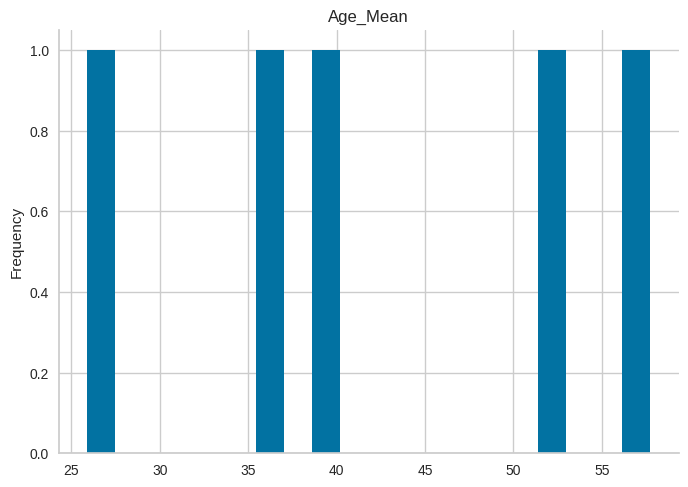

In [18]:
# @title Age_Mean

from matplotlib import pyplot as plt
agg_segment_analysis['Age_Mean'].plot(kind='hist', bins=20, title='Age_Mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

np.random.seed(42)

# Örnek veri seti oluşturma
num_customers = 200
customer_ids = range(1, num_customers + 1)
genders = np.random.choice(['Male', 'Female'], num_customers)
ages = np.random.randint(18, 70, num_customers)
annual_incomes = np.random.randint(15, 150, num_customers)  # bin $
spending_scores = np.random.randint(1, 101, num_customers)  # 1-100

data = {
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'Annual Income (k$)': annual_incomes,
    'Spending Score (1-100)': spending_scores
}

df = pd.DataFrame(data)

# Yeni değişkenler oluşturma
new_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Standartlaştırma
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K-Means Silhouette Skoru: 0.32


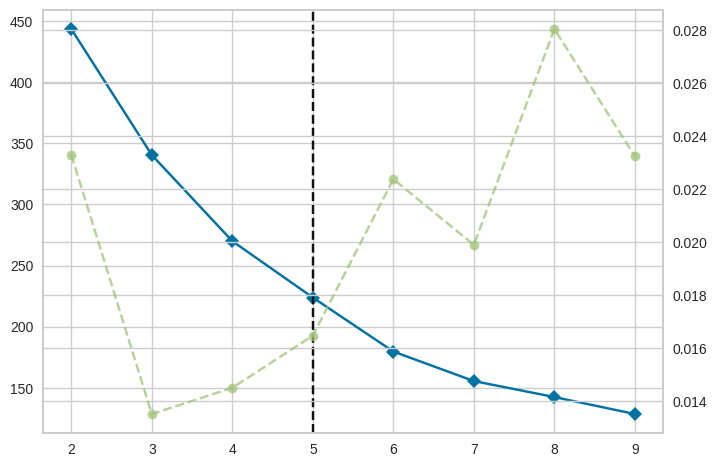

In [31]:
# K-Means için Elbow yöntemi ile optimum küme sayısını belirleme
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow.fit(scaled_df)
optimum_clusters = elbow.elbow_value_

# K-Means modeli oluşturma ve Silhouette skoru hesaplama
kmeans = KMeans(n_clusters=6, random_state=42).fit(scaled_df)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"K-Means Silhouette Skoru: {kmeans_silhouette:.2f}")


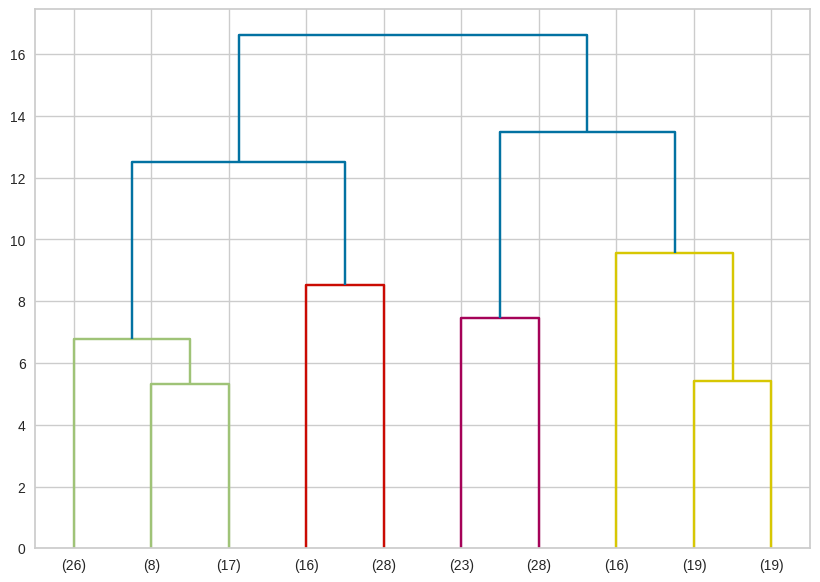

Hierarchical Clustering Silhouette Skoru: 0.24


In [25]:
# Hiyerarşik kümeleme
hc = linkage(scaled_df, method='ward')

# Dendrogram ile optimum küme sayısını belirleme
plt.figure(figsize=(10, 7))
dendrogram(hc, truncate_mode='lastp', p=10, leaf_font_size=10)
plt.axhline(y=150, color='r', linestyle='--')  # Daha düşük bir mesafe eşiği deneyelim
plt.show()

# Agglomerative Clustering kullanarak Hierarchical Clustering modeli oluşturma ve Silhouette skoru hesaplama
agg_cluster = AgglomerativeClustering(n_clusters=optimum_clusters, linkage='ward')
agg_labels_hc = agg_cluster.fit_predict(scaled_df)
hc_silhouette = silhouette_score(scaled_df, agg_labels_hc)
print(f"Hierarchical Clustering Silhouette Skoru: {hc_silhouette:.2f}")


In [26]:
# Agglomerative Clustering modeli oluşturma ve Silhouette skoru hesaplama
agg_cluster = AgglomerativeClustering(n_clusters=optimum_clusters, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_df)
agg_silhouette = silhouette_score(scaled_df, agg_labels)
print(f"Agglomerative Clustering Silhouette Skoru: {agg_silhouette:.2f}")


Agglomerative Clustering Silhouette Skoru: 0.24


In [27]:
# Silhouette skorlarını karşılaştırma
print(f"K-Means Silhouette Skoru: {kmeans_silhouette:.2f}")
print(f"Hierarchical Clustering Silhouette Skoru: {hc_silhouette:.2f}")
print(f"Agglomerative Clustering Silhouette Skoru: {agg_silhouette:.2f}")

best_score = max(kmeans_silhouette, hc_silhouette, agg_silhouette)
if best_score == kmeans_silhouette:
    print("En iyi kümeleme K-Means algoritması ile elde edilmiştir.")
elif best_score == hc_silhouette:
    print("En iyi kümeleme Hierarchical Clustering algoritması ile elde edilmiştir.")
else:
    print("En iyi kümeleme Agglomerative Clustering algoritması ile elde edilmiştir.")


K-Means Silhouette Skoru: 0.29
Hierarchical Clustering Silhouette Skoru: 0.24
Agglomerative Clustering Silhouette Skoru: 0.24
En iyi kümeleme K-Means algoritması ile elde edilmiştir.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimum Küme Sayısı (Silhouette Yöntemi): 6


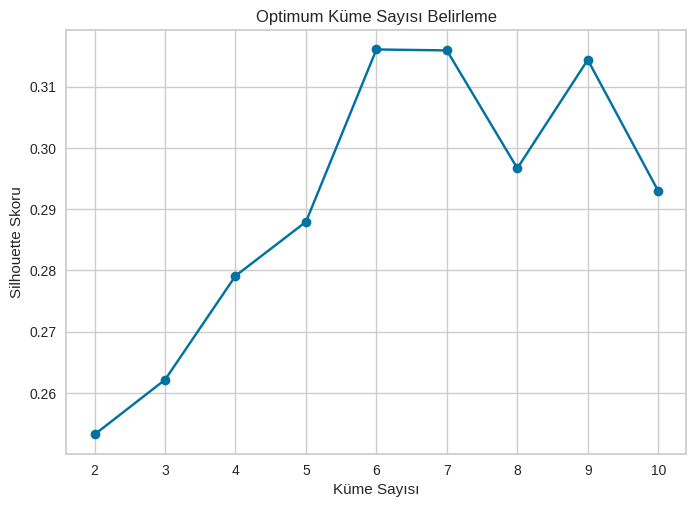

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Optimum küme sayısını Silhouette yöntemiyle belirleme
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# En yüksek Silhouette skorunu elde eden küme sayısını belirleme
optimum_clusters_silhouette = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimum Küme Sayısı (Silhouette Yöntemi): {optimum_clusters_silhouette}")

# Silhouette skorlarının grafiği
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.title('Optimum Küme Sayısı Belirleme')
plt.show()


In [33]:
# Hiyerarşik kümeleme (Agglomerative Clustering)
agg_cluster_hc = AgglomerativeClustering(n_clusters=optimum_clusters_silhouette, linkage='ward')
agg_labels_hc = agg_cluster_hc.fit_predict(scaled_df)
hc_silhouette = silhouette_score(scaled_df, agg_labels_hc)
print(f"Hierarchical Clustering Silhouette Skoru: {hc_silhouette:.2f}")

# Agglomerative Clustering modeli oluşturma ve Silhouette skoru hesaplama
agg_cluster = AgglomerativeClustering(n_clusters=optimum_clusters_silhouette, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_df)
agg_silhouette = silhouette_score(scaled_df, agg_labels)
print(f"Agglomerative Clustering Silhouette Skoru: {agg_silhouette:.2f}")


Hierarchical Clustering Silhouette Skoru: 0.25
Agglomerative Clustering Silhouette Skoru: 0.25


In [34]:
# Silhouette skorlarını karşılaştırma
print(f"K-Means Silhouette Skoru: {kmeans_silhouette:.2f}")
print(f"Hierarchical Clustering Silhouette Skoru: {hc_silhouette:.2f}")
print(f"Agglomerative Clustering Silhouette Skoru: {agg_silhouette:.2f}")

best_score = max(kmeans_silhouette, hc_silhouette, agg_silhouette)
if best_score == kmeans_silhouette:
    print("En iyi kümeleme K-Means algoritması ile elde edilmiştir.")
elif best_score == hc_silhouette:
    print("En iyi kümeleme Hierarchical Clustering algoritması ile elde edilmiştir.")
else:
    print("En iyi kümeleme Agglomerative Clustering algoritması ile elde edilmiştir.")


K-Means Silhouette Skoru: 0.32
Hierarchical Clustering Silhouette Skoru: 0.25
Agglomerative Clustering Silhouette Skoru: 0.25
En iyi kümeleme K-Means algoritması ile elde edilmiştir.
